### Importar bibliotecas e carregar dataset

In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv('dados_estudantes.csv')

print("\nAs 5 primeiras linhas do dataset:")
df.head()


As 5 primeiras linhas do dataset:


,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
0,S00001,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C
1,S00002,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D
2,S00003,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D
3,S00004,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B
4,S00005,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C


### Análise inicial

In [5]:
# Mostra um resumo conciso do DataFrame, incluindo tipos de dados e valores não-nulos
print("Informações gerais do DataFrame:")
df.info()

# Exibe um resumo estatístico das colunas numéricas (média, desvio padrão, etc.)
print("\n\nResumo estatístico das colunas numéricas:")
df.describe()

Informações gerais do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Student_ID                               10000 non-null  object
 1   Age                                      10000 non-null  int64 
 2   Gender                                   10000 non-null  object
 3   Study_Hours_per_Week                     10000 non-null  int64 
 4   Preferred_Learning_Style                 10000 non-null  object
 5   Online_Courses_Completed                 10000 non-null  int64 
 6   Participation_in_Discussions             10000 non-null  object
 7   Assignment_Completion_Rate (%)           10000 non-null  int64 
 8   Exam_Score (%)                           10000 non-null  int64 
 9   Attendance_Rate (%)                      10000 non-null  int64 
 10  Use_of_Educational_Tech   

,Age,Study_Hours_per_Week,Online_Courses_Completed,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,23.478800,27.130300,10.007900,74.922000,70.188900,75.085100,14.936500,6.979300
std,3.461986,13.002547,6.136726,14.675437,17.649447,14.749251,9.022639,1.996965
min,18.000000,5.000000,0.000000,50.000000,40.000000,50.000000,0.000000,4.000000
25%,20.000000,16.000000,5.000000,62.000000,55.000000,62.000000,7.000000,5.000000
50%,23.000000,27.000000,10.000000,75.000000,70.000000,75.000000,15.000000,7.000000
75%,27.000000,38.000000,15.000000,88.000000,85.000000,88.000000,23.000000,9.000000
max,29.000000,49.000000,20.000000,100.000000,100.000000,100.000000,30.000000,10.000000


### Variável alvo

In [6]:
# Verificar quais são as notas finais possíveis no nosso dataset
print("Valores únicos na coluna 'Final_Grade':")
print(df['Final_Grade'].unique())

# Criamos a nossa nova coluna 'Aprovado'
# Notas A, B, C viram 1 (Aprovado). Notas D e F viram 0 (Reprovado).
mapeamento_notas = {'A': 1, 'B': 1, 'C': 1, 'D': 0, 'F': 0}
df['Aprovado'] = df['Final_Grade'].map(mapeamento_notas)

# Verificar a distribuição da nova coluna para ver quantos aprovados e reprovados temos
print("\nDistribuição de Aprovados (1) e Reprovados (0):")
print(df['Aprovado'].value_counts())

# Exibição com a nova coluna
print("\nDataFrame com a nova coluna 'Aprovado':")
df.head()

Valores únicos na coluna 'Final_Grade':
['C' 'D' 'B' 'A']

Distribuição de Aprovados (1) e Reprovados (0):
Aprovado
1    7573
0    2427
Name: count, dtype: int64

DataFrame com a nova coluna 'Aprovado':


,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade,Aprovado
0,S00001,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C,1
1,S00002,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D,0
2,S00003,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D,0
3,S00004,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B,1
4,S00005,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C,1


### Remover Student_ID e Final_Grade

In [7]:
# Lista das colunas que vamos remover
colunas_para_remover = ['Student_ID', 'Final_Grade']

# Remove as colunas do DataFrame
# axis=1 indica que estamos removendo colunas, não linhas
df = df.drop(columns=colunas_para_remover)

# Exibe as 5 primeiras linhas do DataFrame atualizado para confirmar a remoção
print("DataFrame após a remoção das colunas 'Student_ID' e 'Final_Grade':")
df.head()

DataFrame após a remoção das colunas 'Student_ID' e 'Final_Grade':


,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Aprovado
0,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,1
1,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,0
2,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,0
3,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,1
4,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,1


### Encoding

In [8]:
# df.info() nos mostra as colunas que ainda são do tipo 'object' (texto)
print("Tipos de dados ANTES da conversão:")
df.info()

# Usamos pd.get_dummies para converter todas as colunas categóricas em numéricas
# O parâmetro drop_first=True remove a primeira categoria de cada variável para evitar redundância, o que é uma boa prática.
df = pd.get_dummies(df, drop_first=True)

print("\n\nTipos de dados DEPOIS da conversão:")
# Note como o número de colunas aumentou
df.info()

print("\n\nVisualizando o DataFrame transformado:")
# Observe as novas colunas criadas (ex: Gender_Male, etc.)
df.head()

Tipos de dados ANTES da conversão:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Age                                      10000 non-null  int64 
 1   Gender                                   10000 non-null  object
 2   Study_Hours_per_Week                     10000 non-null  int64 
 3   Preferred_Learning_Style                 10000 non-null  object
 4   Online_Courses_Completed                 10000 non-null  int64 
 5   Participation_in_Discussions             10000 non-null  object
 6   Assignment_Completion_Rate (%)           10000 non-null  int64 
 7   Exam_Score (%)                           10000 non-null  int64 
 8   Attendance_Rate (%)                      10000 non-null  int64 
 9   Use_of_Educational_Tech                  10000 non-null  object
 10  Self_Reported_Stress_Lev

,Age,Study_Hours_per_Week,Online_Courses_Completed,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Aprovado,Gender_Male,Gender_Other,Preferred_Learning_Style_Kinesthetic,Preferred_Learning_Style_Reading/Writing,Preferred_Learning_Style_Visual,Participation_in_Discussions_Yes,Use_of_Educational_Tech_Yes,Self_Reported_Stress_Level_Low,Self_Reported_Stress_Level_Medium
0,18,48,14,100,69,66,9,8,1,False,False,True,False,False,True,True,False,False
1,29,30,20,71,40,57,28,8,0,False,False,False,True,False,False,True,False,True
2,20,47,11,60,43,79,13,7,0,False,False,True,False,False,False,True,True,False
3,23,13,0,63,70,60,24,10,1,False,False,False,False,False,True,True,True,False
4,19,24,19,59,63,93,26,8,1,False,False,False,False,False,True,True,False,True


### Divisão Treino e Teste

In [10]:
from sklearn.model_selection import train_test_split

# 1. Separar as features (X) do alvo (y)
# X contém todas as colunas, EXCETO 'Aprovado'
X = df.drop('Aprovado', axis=1)

# y contém APENAS a coluna 'Aprovado'
y = df['Aprovado']


# 2. Dividir os dados em conjuntos de treino e teste
# test_size=0.2 significa que 20% dos dados serão para teste e 80% para treino.
# random_state=42 garante que a divisão seja a mesma toda vez que rodarmos o código,
# o que torna nossos resultados reprodutíveis.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Vamos verificar o tamanho de cada conjunto criado
print("Formato dos dados de treino:")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")

print("\nFormato dos dados de teste:")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

Formato dos dados de treino:
X_train: (8000, 17)
y_train: (8000,)

Formato dos dados de teste:
X_test: (2000, 17)
y_test: (2000,)


### Treinamento do modelo e visualização de importância das Features

Modelo de Regressão Logística treinado com sucesso!

Gerando gráfico de importância das features...


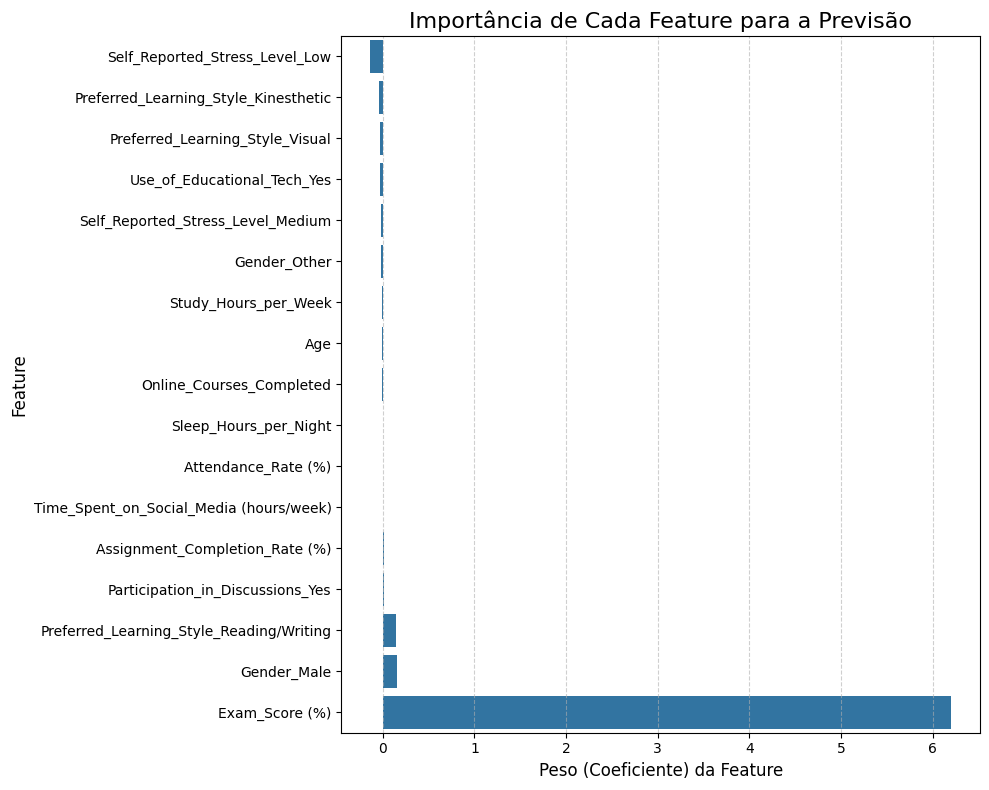

In [13]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Parte 1: Treinamento do Modelo (igual ao anterior) ---
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)
print("Modelo de Regressão Logística treinado com sucesso!\n")


# --- Parte 2: Visualização da Importância das Features ---
print("Gerando gráfico de importância das features...")

# O modelo treinado armazena os 'coeficientes' para cada feature.
# Estes coeficientes representam a importância de cada uma.
importancias = pd.Series(modelo.coef_[0], index=X_train.columns)

# Ordenamos as importâncias para o gráfico ficar mais claro
importancias_ordenadas = importancias.sort_values()

# Criamos o gráfico de barras
plt.figure(figsize=(10, 8)) # Define o tamanho da figura
sns.barplot(x=importancias_ordenadas.values, y=importancias_ordenadas.index, orient='h')

# Adiciona títulos e rótulos
plt.title('Importância de Cada Feature para a Previsão', fontsize=16)
plt.xlabel('Peso (Coeficiente) da Feature', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(True, axis='x', linestyle='--', alpha=0.6) # Adiciona uma grade para facilitar a leitura
plt.tight_layout() # Ajusta o layout para não cortar os nomes

# Mostra o gráfico
plt.show()

### Avaliação do modelo

Acurácia do modelo: 100.00%

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       501
           1       1.00      1.00      1.00      1499

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Matriz de Confusão:


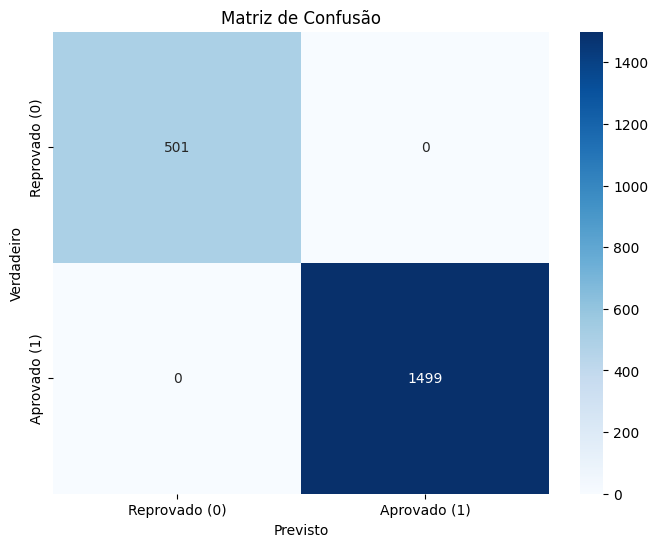

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Fazer previsões no conjunto de teste
previsoes = modelo.predict(X_test)

# 2. Calcular a Acurácia
acuracia = accuracy_score(y_test, previsoes)
print(f"Acurácia do modelo: {acuracia * 100:.2f}%\n")

# 3. Exibir o Relatório de Classificação
# Mostra precisão, recall, f1-score para cada classe (0 e 1)
print("Relatório de Classificação:")
print(classification_report(y_test, previsoes))

# 4. Exibir a Matriz de Confusão de forma visual
print("Matriz de Confusão:")
cm = confusion_matrix(y_test, previsoes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Reprovado (0)', 'Aprovado (1)'],
            yticklabels=['Reprovado (0)', 'Aprovado (1)'])
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.title('Matriz de Confusão')
plt.show()

### Removendo Exam_Score

In [17]:
df_sem_exame = df.drop('Exam_Score (%)', axis=1)

print("\n\nDataFrame refinado (sem 'Exam_Score (%)')")
df_sem_exame.head()



DataFrame refinado (sem 'Exam_Score (%)')


,Age,Study_Hours_per_Week,Online_Courses_Completed,Assignment_Completion_Rate (%),Attendance_Rate (%),Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Aprovado,Gender_Male,Gender_Other,Preferred_Learning_Style_Kinesthetic,Preferred_Learning_Style_Reading/Writing,Preferred_Learning_Style_Visual,Participation_in_Discussions_Yes,Use_of_Educational_Tech_Yes,Self_Reported_Stress_Level_Low,Self_Reported_Stress_Level_Medium
0,18,48,14,100,66,9,8,1,False,False,True,False,False,True,True,False,False
1,29,30,20,71,57,28,8,0,False,False,False,True,False,False,True,False,True
2,20,47,11,60,79,13,7,0,False,False,True,False,False,False,True,True,False
3,23,13,0,63,60,24,10,1,False,False,False,False,False,True,True,True,False
4,19,24,19,59,93,26,8,1,False,False,False,False,False,True,True,False,True


### Redivisão do treino e teste

In [18]:
from sklearn.model_selection import train_test_split

# 1. Separar as features (X) do alvo (y) do novo DataFrame
# X_novo contém todas as colunas, exceto 'Aprovado'
X_novo = df_sem_exame.drop('Aprovado', axis=1)

# y_novo continua sendo o mesmo (a coluna 'Aprovado'), mas o pegamos do novo df por consistência
y_novo = df_sem_exame['Aprovado']


# 2. Dividir os dados em conjuntos de treino e teste
# Usamos o mesmo random_state=42 para garantir que a divisão seja comparável à anterior.
X_train_novo, X_test_novo, y_train_novo, y_test_novo = train_test_split(
    X_novo, y_novo, test_size=0.2, random_state=42
)


# Vamos verificar o formato dos novos conjuntos
# Note que o número de colunas (features) agora será 16, e não 17.
print("Formato dos novos dados de treino:")
print(f"X_train_novo: {X_train_novo.shape}")
print(f"y_train_novo: {y_train_novo.shape}")

print("\nFormato dos novos dados de teste:")
print(f"X_test_novo: {X_test_novo.shape}")
print(f"y_test_novo: {y_test_novo.shape}")

Formato dos novos dados de treino:
X_train_novo: (8000, 16)
y_train_novo: (8000,)

Formato dos novos dados de teste:
X_test_novo: (2000, 16)
y_test_novo: (2000,)


### Treino e avaliação

Novo modelo realista treinado com sucesso!

Acurácia do novo modelo: 74.95%

(Acurácia do modelo anterior era 100.00%)

Novo Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       501
           1       0.75      1.00      0.86      1499

    accuracy                           0.75      2000
   macro avg       0.37      0.50      0.43      2000
weighted avg       0.56      0.75      0.64      2000

Nova Matriz de Confusão:


/home/ixcsoft/PycharmProjects/ProjetoAbex/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/ixcsoft/PycharmProjects/ProjetoAbex/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/ixcsoft/PycharmProjects/ProjetoAbex/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _

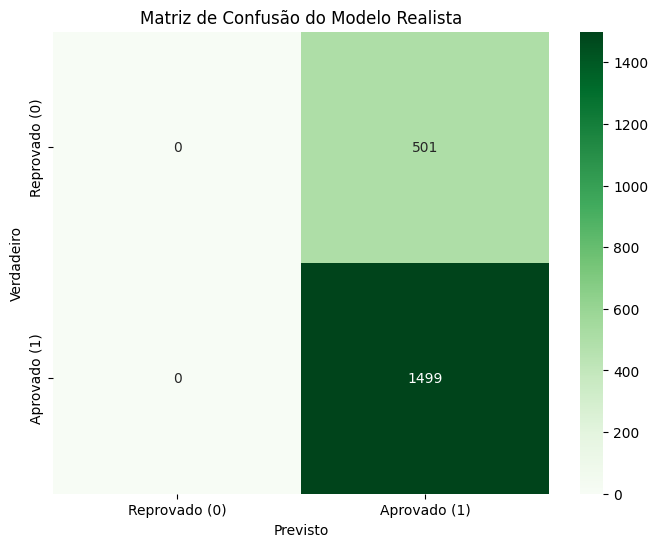

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cria e treina o novo modelo
modelo_novo = LogisticRegression(max_iter=2000) # Aumentei um pouco as iterações
modelo_novo.fit(X_train_novo, y_train_novo)

print("Novo modelo realista treinado com sucesso!\n")

# 2. Faz previsões no conjunto de teste refinado
previsoes_novo = modelo_novo.predict(X_test_novo)

# 3. Avalia a performance do novo modelo
acuracia_nova = accuracy_score(y_test_novo, previsoes_novo)
print(f"Acurácia do novo modelo: {acuracia_nova * 100:.2f}%\n")

# Compara com a acurácia anterior
print(f"(Acurácia do modelo anterior era 100.00%)\n")

# 4. Exibe o Relatório de Classificação
print("Novo Relatório de Classificação:")
print(classification_report(y_test_novo, previsoes_novo))

# 5. Exibe a nova Matriz de Confusão
print("Nova Matriz de Confusão:")
cm_novo = confusion_matrix(y_test_novo, previsoes_novo)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_novo, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Reprovado (0)', 'Aprovado (1)'],
            yticklabels=['Reprovado (0)', 'Aprovado (1)'])
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.title('Matriz de Confusão do Modelo Realista')
plt.show()

### Adição do class_balanced

Treinando o modelo final com balanceamento de classes...
Modelo final treinado com sucesso!

Acurácia do modelo final balanceado: 49.80%

Relatório de Classificação Final:
              precision    recall  f1-score   support

           0       0.25      0.50      0.33       501
           1       0.75      0.50      0.60      1499

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.46      2000
weighted avg       0.62      0.50      0.53      2000

Matriz de Confusão Final:


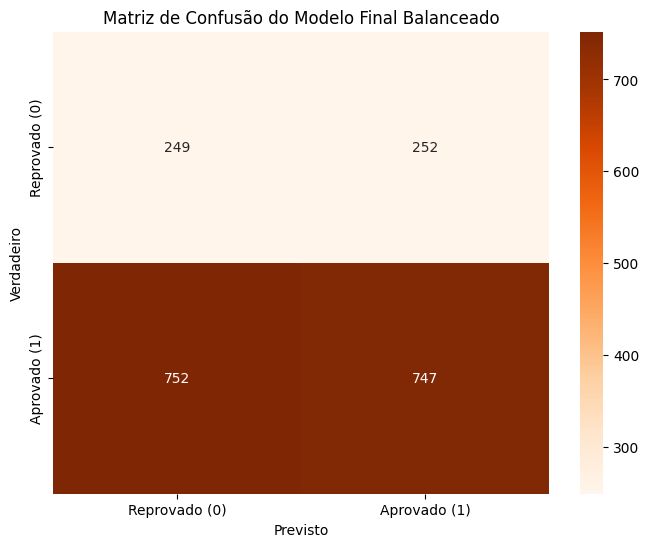

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cria e treina o modelo final com o parâmetro de balanceamento
print("Treinando o modelo final com balanceamento de classes...")
modelo_final = LogisticRegression(max_iter=2000, class_weight='balanced') # <-- A MUDANÇA ESTÁ AQUI!
modelo_final.fit(X_train_novo, y_train_novo)

print("Modelo final treinado com sucesso!\n")

# 2. Faz previsões com o modelo final
previsoes_final = modelo_final.predict(X_test_novo)

# 3. Avalia a performance do modelo final
acuracia_final = accuracy_score(y_test_novo, previsoes_final)
print(f"Acurácia do modelo final balanceado: {acuracia_final * 100:.2f}%\n")

# 4. Exibe o Relatório de Classificação final
print("Relatório de Classificação Final:")
print(classification_report(y_test_novo, previsoes_final))

# 5. Exibe a Matriz de Confusão final
print("Matriz de Confusão Final:")
cm_final = confusion_matrix(y_test_novo, previsoes_final)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Reprovado (0)', 'Aprovado (1)'],
            yticklabels=['Reprovado (0)', 'Aprovado (1)'])
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.title('Matriz de Confusão do Modelo Final Balanceado')
plt.show()

### Salvar para a API

In [21]:
import joblib

# Nome dos arquivos que serão criados (vamos sobrescrever os antigos)
nome_arquivo_modelo = 'modelo_aprovacao.joblib'
nome_arquivo_colunas = 'colunas_modelo.joblib'

# Salva o objeto do modelo final treinado
joblib.dump(modelo_final, nome_arquivo_modelo)

# Salva a lista de nomes de colunas do X_train_novo
# A API precisará desta nova lista com 16 colunas.
joblib.dump(X_train_novo.columns, nome_arquivo_colunas)

print(f"Modelo final salvo com sucesso no arquivo: {nome_arquivo_modelo}")
print(f"Colunas do modelo final salvas com sucesso no arquivo: {nome_arquivo_colunas}")

print("\n\nPróximos passos:")
print("1. Verifique se os arquivos 'modelo_aprovacao.joblib' e 'colunas_modelo.joblib' foram atualizados na sua pasta.")
print("2. A sua API e o seu front-end do Streamlit já estão prontos! Não precisam de nenhuma alteração no código, pois eles irão carregar esses novos arquivos automaticamente.")
print("3. Basta reiniciar o servidor Flask (app.py) e testar a aplicação novamente!")

Modelo final salvo com sucesso no arquivo: modelo_aprovacao.joblib
Colunas do modelo final salvas com sucesso no arquivo: colunas_modelo.joblib


Próximos passos:
1. Verifique se os arquivos 'modelo_aprovacao.joblib' e 'colunas_modelo.joblib' foram atualizados na sua pasta.
2. A sua API e o seu front-end do Streamlit já estão prontos! Não precisam de nenhuma alteração no código, pois eles irão carregar esses novos arquivos automaticamente.
3. Basta reiniciar o servidor Flask (app.py) e testar a aplicação novamente!
